In [1]:

import pandas as pd
import numpy as np

In [2]:
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
from google.colab import files
uploades = files.upload()

Saving TweethateETHMU.csv to TweethateETHMU.csv


In [31]:
data = pd.read_csv('TweethateETHMU.csv', encoding='latin1', on_bad_lines='skip')
data.head(2)


,"conversation_id_str,""cre;ated;_at;""""""","favori"";te_cou;""nt""""","full_text""""","id_str""""","image_url""""","in_reply_to_screen_name""""","lang""""","location""""","quote_count""""","reply_count""""","retweet_count""""","tweet_url""""","user_id_str""""","username"""""";label"
0,"1850688798302032235,""Sun;Oct;27;23:59:28;0;""20...","0""""",Erik Ten Hag reacts to West Ham defeat https:/...,"1850688798302032235""""","""","""","en""""","Croydon""""","0""""","0""""","0""""",https://x.com/davidleeventers/status/185068879...,"82950019""""","davidleeventers"""""";no-hate"
1,"1850687773650374729,""Sun;Oct;27;23:55:24;0;""20...","14""""",'You can't be 14th in the league after nine ga...,"1850687773650374729""""","""","""","en""""","""","0""""","3""""","1""""",https://x.com/MailSport/status/185068777365037...,"111556576""""","MailSport"""""";hate"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   conversation_id_str,"cre;ated;_at;"""  366 non-null    object
 1   favori";te_cou;"nt""                   366 non-null    object
 2   full_text""                            366 non-null    object
 3   id_str""                               356 non-null    object
 4   image_url""                            356 non-null    object
 5   in_reply_to_screen_name""              356 non-null    object
 6   lang""                                 356 non-null    object
 7   location""                             356 non-null    object
 8   quote_count""                          356 non-null    object
 9   reply_count""                          356 non-null    object
 10  retweet_count""                        356 non-null    object
 11  tweet_url""        

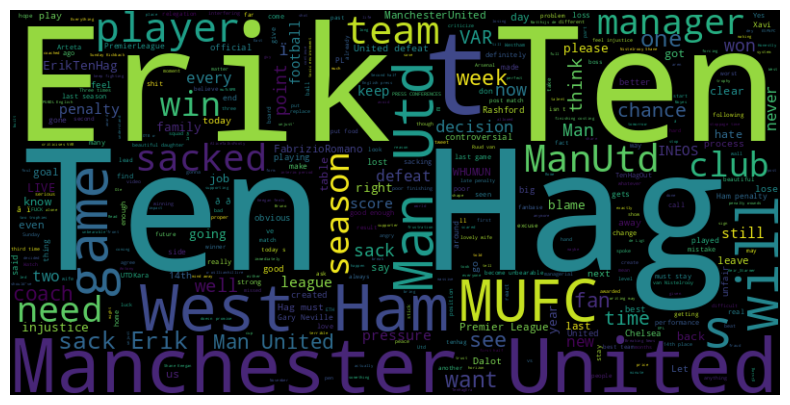

In [11]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Gabungkan teks dari kolom 'full_text' menjadi satu string
text = ' '.join(data['full_text""'].tolist())

# Tambahkan stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Buat wordcloud
wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

# Tampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


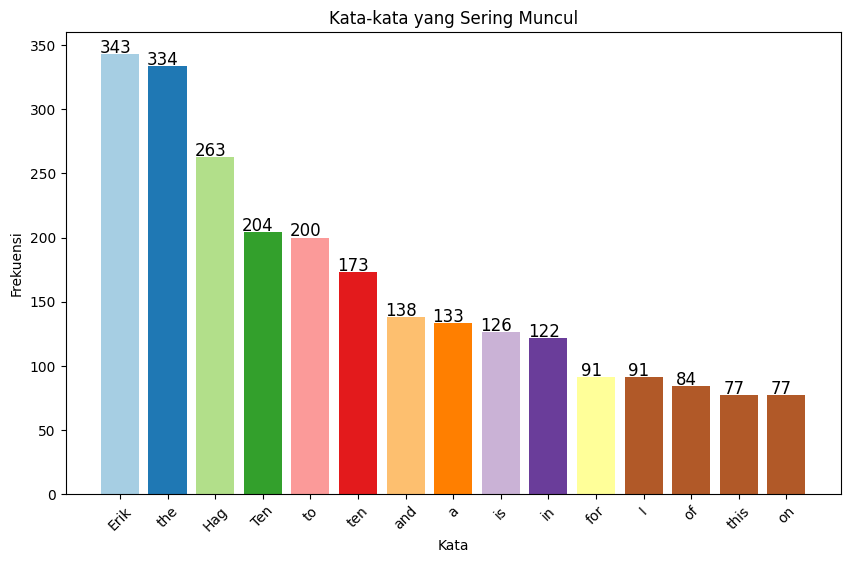

In [13]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan teks dari kolom 'full_text'
text = ' '.join(data['full_text""'])

# Tokenisasi teks dan hitung jumlah kemunculan setiap kata
tokens = text.split()
word_counts = Counter(tokens)

# Ambil 10 kata dengan frekuensi tertinggi
top_words = word_counts.most_common(15)
word, count = zip(*top_words)

# Warna untuk bar chart
colors = plt.cm.Paired(range(len(word)))

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("Kata-kata yang Sering Muncul")
plt.xticks(rotation=45)

# Tambahkan nilai frekuensi di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Tampilkan plot
plt.show()


In [14]:
df = pd.DataFrame(data[['full_text""']])
df.head(500)

,"full_text"""""
0,Erik Ten Hag reacts to West Ham defeat https:/...
1,'You can't be 14th in the league after nine ga...
2,Erik Ten Hag was the only one to get the right...
3,Pound for pound Erik Ten Hag is the worst coac...
4,Again I asked what's the difference between Xa...
...,...
361,One chance one goal. Erik Ten Hag's dipshits s...
362,LIVE MAN UTD / WEST HAM PRESS CONFERENCES LIV...
363,One win in their last 8 games #giveandgoal #MU...
364,INEOS are too scared to pull the trigger on Er...


In [17]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

# Fungsi untuk menghapus angka dan karakter non-alfanumerik
def remove_angka(tweet):
    tweet = re.sub(r'[0-9]+', '', tweet)  # Hapus angka
    tweet = re.sub(r'\W+', ' ', tweet)   # Hapus karakter non-alfanumerik
    tweet = re.sub(r'^RT[\s]+', '', tweet)  # Hapus retweet (RT)
    return tweet

# Fungsi untuk menghapus tanda baca
def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

# Pipeline preprocessing
df['cleansing'] = df['full_text""'].apply(lambda x: remove_URL(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing'] = df['cleansing'].apply(lambda x: remove_punct(x))
# df['cleansing'] = df['cleansing'].apply(lambda x: remove_angka(x))

# Tampilkan hasil
df.head(411)


,"full_text""""",cleansing
0,Erik Ten Hag reacts to West Ham defeat https:/...,Erik Ten Hag reacts to West Ham defeat via Yo...
1,'You can't be 14th in the league after nine ga...,You cant be 14th in the league after nine game...
2,Erik Ten Hag was the only one to get the right...,Erik Ten Hag was the only one to get the right...
3,Pound for pound Erik Ten Hag is the worst coac...,Pound for pound Erik Ten Hag is the worst coac...
4,Again I asked what's the difference between Xa...,Again I asked whats the difference between Xav...
...,...,...
361,One chance one goal. Erik Ten Hag's dipshits s...,One chance one goal Erik Ten Hags dipshits sco...
362,LIVE MAN UTD / WEST HAM PRESS CONFERENCES LIV...,LIVE MAN UTD WEST HAM PRESS CONFERENCES LIVE...
363,One win in their last 8 games #giveandgoal #MU...,One win in their last 8 games giveandgoal MUFC...
364,INEOS are too scared to pull the trigger on Er...,INEOS are too scared to pull the trigger on Er...


In [18]:
# Tokenisasi dan Case Folding
df['Tokenization and Case Folding'] = df['cleansing'].apply(lambda x: x.lower().split())

# Tampilkan hasil
df.head(411)


,"full_text""""",cleansing,Tokenization and Case Folding
0,Erik Ten Hag reacts to West Ham defeat https:/...,Erik Ten Hag reacts to West Ham defeat via Yo...,"[erik, ten, hag, reacts, to, west, ham, defeat..."
1,'You can't be 14th in the league after nine ga...,You cant be 14th in the league after nine game...,"[you, cant, be, 14th, in, the, league, after, ..."
2,Erik Ten Hag was the only one to get the right...,Erik Ten Hag was the only one to get the right...,"[erik, ten, hag, was, the, only, one, to, get,..."
3,Pound for pound Erik Ten Hag is the worst coac...,Pound for pound Erik Ten Hag is the worst coac...,"[pound, for, pound, erik, ten, hag, is, the, w..."
4,Again I asked what's the difference between Xa...,Again I asked whats the difference between Xav...,"[again, i, asked, whats, the, difference, betw..."
...,...,...,...
361,One chance one goal. Erik Ten Hag's dipshits s...,One chance one goal Erik Ten Hags dipshits sco...,"[one, chance, one, goal, erik, ten, hags, dips..."
362,LIVE MAN UTD / WEST HAM PRESS CONFERENCES LIV...,LIVE MAN UTD WEST HAM PRESS CONFERENCES LIVE...,"[live, man, utd, west, ham, press, conferences..."
363,One win in their last 8 games #giveandgoal #MU...,One win in their last 8 games giveandgoal MUFC...,"[one, win, in, their, last, 8, games, giveandg..."
364,INEOS are too scared to pull the trigger on Er...,INEOS are too scared to pull the trigger on Er...,"[ineos, are, too, scared, to, pull, the, trigg..."


In [20]:
from nltk.corpus import stopwords
import nltk

# Unduh daftar stopwords NLTK
nltk.download('stopwords')

# Definisikan stopwords bahasa Inggris
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Penerapan filtering/stopword removal
df['Filtering/stopword removal'] = df['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))

# Tampilkan hasil
df.head(411)

,"full_text""""",cleansing,Tokenization and Case Folding,Filtering/stopword removal
0,Erik Ten Hag reacts to West Ham defeat https:/...,Erik Ten Hag reacts to West Ham defeat via Yo...,"[erik, ten, hag, reacts, to, west, ham, defeat...","[erik, ten, hag, reacts, west, ham, defeat, vi..."
1,'You can't be 14th in the league after nine ga...,You cant be 14th in the league after nine game...,"[you, cant, be, 14th, in, the, league, after, ...","[cant, 14th, league, nine, games, gary, nevill..."
2,Erik Ten Hag was the only one to get the right...,Erik Ten Hag was the only one to get the right...,"[erik, ten, hag, was, the, only, one, to, get,...","[erik, ten, hag, one, get, rightfully, full, s..."
3,Pound for pound Erik Ten Hag is the worst coac...,Pound for pound Erik Ten Hag is the worst coac...,"[pound, for, pound, erik, ten, hag, is, the, w...","[pound, pound, erik, ten, hag, worst, coach, l..."
4,Again I asked what's the difference between Xa...,Again I asked whats the difference between Xav...,"[again, i, asked, whats, the, difference, betw...","[asked, whats, difference, xavi, erik, ten, hag]"
...,...,...,...,...
361,One chance one goal. Erik Ten Hag's dipshits s...,One chance one goal Erik Ten Hags dipshits sco...,"[one, chance, one, goal, erik, ten, hags, dips...","[one, chance, one, goal, erik, ten, hags, dips..."
362,LIVE MAN UTD / WEST HAM PRESS CONFERENCES LIV...,LIVE MAN UTD WEST HAM PRESS CONFERENCES LIVE...,"[live, man, utd, west, ham, press, conferences...","[live, man, utd, west, ham, press, conferences..."
363,One win in their last 8 games #giveandgoal #MU...,One win in their last 8 games giveandgoal MUFC...,"[one, win, in, their, last, 8, games, giveandg...","[one, win, last, 8, games, giveandgoal, mufc, ..."
364,INEOS are too scared to pull the trigger on Er...,INEOS are too scared to pull the trigger on Er...,"[ineos, are, too, scared, to, pull, the, trigg...","[ineos, scared, pull, trigger, erik, ten, hag,..."


In [28]:
from nltk.stem.snowball import SnowballStemmer

# Initialize SnowballStemmer for English
stemmer = SnowballStemmer("english")

# Define stem function
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# Apply stemming to a DataFrame column
df['stemmed_data'] = df['Filtering/stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(411)

#Snowball karena support banyak bahasa


,"full_text""""",cleansing,Tokenization and Case Folding,Filtering/stopword removal,stemming_data,stemmed_data
0,Erik Ten Hag reacts to West Ham defeat https:/...,Erik Ten Hag reacts to West Ham defeat via Yo...,"[erik, ten, hag, reacts, to, west, ham, defeat...","[erik, ten, hag, reacts, west, ham, defeat, vi...",erik ten hag react west ham defeat via youtub ...,erik ten hag react west ham defeat via youtub ...
1,'You can't be 14th in the league after nine ga...,You cant be 14th in the league after nine game...,"[you, cant, be, 14th, in, the, league, after, ...","[cant, 14th, league, nine, games, gary, nevill...",cant 14th leagu nine game gari nevill pinpoint...,cant 14th leagu nine game gari nevill pinpoint...
2,Erik Ten Hag was the only one to get the right...,Erik Ten Hag was the only one to get the right...,"[erik, ten, hag, was, the, only, one, to, get,...","[erik, ten, hag, one, get, rightfully, full, s...",erik ten hag one get right full support system...,erik ten hag one get right full support system...
3,Pound for pound Erik Ten Hag is the worst coac...,Pound for pound Erik Ten Hag is the worst coac...,"[pound, for, pound, erik, ten, hag, is, the, w...","[pound, pound, erik, ten, hag, worst, coach, l...",pound pound erik ten hag worst coach leagu tea...,pound pound erik ten hag worst coach leagu tea...
4,Again I asked what's the difference between Xa...,Again I asked whats the difference between Xav...,"[again, i, asked, whats, the, difference, betw...","[asked, whats, difference, xavi, erik, ten, hag]",ask what differ xavi erik ten hag,ask what differ xavi erik ten hag
...,...,...,...,...,...,...
361,One chance one goal. Erik Ten Hag's dipshits s...,One chance one goal Erik Ten Hags dipshits sco...,"[one, chance, one, goal, erik, ten, hags, dips...","[one, chance, one, goal, erik, ten, hags, dips...",one chanc one goal erik ten hag dipshit score ...,one chanc one goal erik ten hag dipshit score ...
362,LIVE MAN UTD / WEST HAM PRESS CONFERENCES LIV...,LIVE MAN UTD WEST HAM PRESS CONFERENCES LIVE...,"[live, man, utd, west, ham, press, conferences...","[live, man, utd, west, ham, press, conferences...",live man utd west ham press confer live erik t...,live man utd west ham press confer live erik t...
363,One win in their last 8 games #giveandgoal #MU...,One win in their last 8 games giveandgoal MUFC...,"[one, win, in, their, last, 8, games, giveandg...","[one, win, last, 8, games, giveandgoal, mufc, ...",one win last 8 game giveandgo mufc manchesteru...,one win last 8 game giveandgo mufc manchesteru...
364,INEOS are too scared to pull the trigger on Er...,INEOS are too scared to pull the trigger on Er...,"[ineos, are, too, scared, to, pull, the, trigg...","[ineos, scared, pull, trigger, erik, ten, hag,...",ineo scare pull trigger erik ten hag scare adm...,ineo scare pull trigger erik ten hag scare adm...


In [29]:
df.drop_duplicates(subset="stemmed_data", keep="first", inplace=True)
df.head(411)


,"full_text""""",cleansing,Tokenization and Case Folding,Filtering/stopword removal,stemming_data,stemmed_data
0,Erik Ten Hag reacts to West Ham defeat https:/...,Erik Ten Hag reacts to West Ham defeat via Yo...,"[erik, ten, hag, reacts, to, west, ham, defeat...","[erik, ten, hag, reacts, west, ham, defeat, vi...",erik ten hag react west ham defeat via youtub ...,erik ten hag react west ham defeat via youtub ...
1,'You can't be 14th in the league after nine ga...,You cant be 14th in the league after nine game...,"[you, cant, be, 14th, in, the, league, after, ...","[cant, 14th, league, nine, games, gary, nevill...",cant 14th leagu nine game gari nevill pinpoint...,cant 14th leagu nine game gari nevill pinpoint...
2,Erik Ten Hag was the only one to get the right...,Erik Ten Hag was the only one to get the right...,"[erik, ten, hag, was, the, only, one, to, get,...","[erik, ten, hag, one, get, rightfully, full, s...",erik ten hag one get right full support system...,erik ten hag one get right full support system...
3,Pound for pound Erik Ten Hag is the worst coac...,Pound for pound Erik Ten Hag is the worst coac...,"[pound, for, pound, erik, ten, hag, is, the, w...","[pound, pound, erik, ten, hag, worst, coach, l...",pound pound erik ten hag worst coach leagu tea...,pound pound erik ten hag worst coach leagu tea...
4,Again I asked what's the difference between Xa...,Again I asked whats the difference between Xav...,"[again, i, asked, whats, the, difference, betw...","[asked, whats, difference, xavi, erik, ten, hag]",ask what differ xavi erik ten hag,ask what differ xavi erik ten hag
...,...,...,...,...,...,...
360,Ineos and Jim ractiffe are longing to play tru...,Ineos and Jim ractiffe are longing to play tru...,"[ineos, and, jim, ractiffe, are, longing, to, ...","[ineos, jim, ractiffe, longing, play, truth, d...",ineo jim ractiff long play truth dare erik ten...,ineo jim ractiff long play truth dare erik ten...
361,One chance one goal. Erik Ten Hag's dipshits s...,One chance one goal Erik Ten Hags dipshits sco...,"[one, chance, one, goal, erik, ten, hags, dips...","[one, chance, one, goal, erik, ten, hags, dips...",one chanc one goal erik ten hag dipshit score ...,one chanc one goal erik ten hag dipshit score ...
363,One win in their last 8 games #giveandgoal #MU...,One win in their last 8 games giveandgoal MUFC...,"[one, win, in, their, last, 8, games, giveandg...","[one, win, last, 8, games, giveandgoal, mufc, ...",one win last 8 game giveandgo mufc manchesteru...,one win last 8 game giveandgo mufc manchesteru...
364,INEOS are too scared to pull the trigger on Er...,INEOS are too scared to pull the trigger on Er...,"[ineos, are, too, scared, to, pull, the, trigg...","[ineos, scared, pull, trigger, erik, ten, hag,...",ineo scare pull trigger erik ten hag scare adm...,ineo scare pull trigger erik ten hag scare adm...


In [30]:
df.to_csv('Preprocessing_HateETH.csv', encoding='utf-8', index=False)


In [32]:
data = pd.read_csv('Preprocessing_HateETH.csv', encoding='latin1', on_bad_lines='skip')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   full_text""                    357 non-null    object
 1   cleansing                      357 non-null    object
 2   Tokenization and Case Folding  357 non-null    object
 3   Filtering/stopword removal     357 non-null    object
 4   stemming_data                  357 non-null    object
 5   stemmed_data                   357 non-null    object
dtypes: object(6)
memory usage: 16.9+ KB


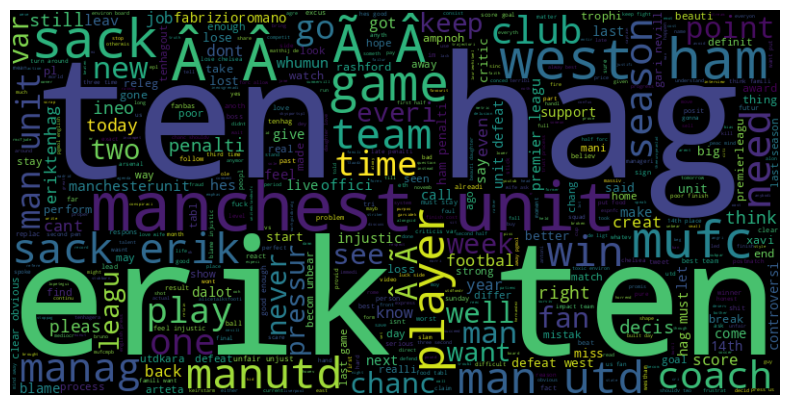

In [33]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Gabungkan teks dari kolom 'full_text' menjadi satu string
text = ' '.join(data['stemmed_data'].tolist())

# Tambahkan stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Buat wordcloud
wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)
wc.generate(text)

# Tampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


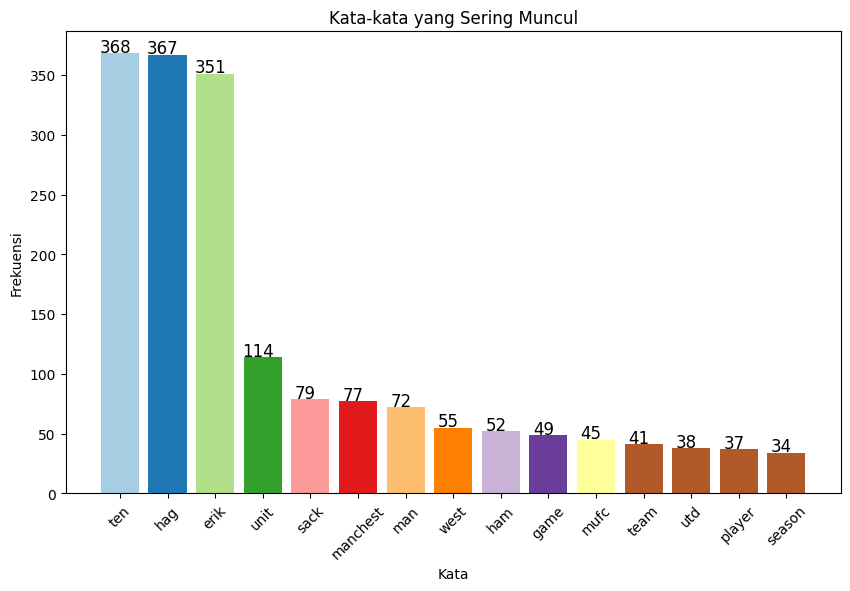

In [34]:
import matplotlib.pyplot as plt
from collections import Counter

# Gabungkan teks dari kolom 'full_text'
text = ' '.join(data['stemmed_data'])

# Tokenisasi teks dan hitung jumlah kemunculan setiap kata
tokens = text.split()
word_counts = Counter(tokens)

# Ambil 10 kata dengan frekuensi tertinggi
top_words = word_counts.most_common(15)
word, count = zip(*top_words)

# Warna untuk bar chart
colors = plt.cm.Paired(range(len(word)))

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("Kata-kata yang Sering Muncul")
plt.xticks(rotation=45)

# Tambahkan nilai frekuensi di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

# Tampilkan plot
plt.show()
